## SolarForecast - Feature engineering
### Data located in mariadb table SolarEnergyFc
#### Columns:
+  TimeStamp ... current timestamp
+  EnergyHour ... PV yield within the last hour [kWh]
+  Brightness ... local brightness - Source: local sensor
+  Month ... Month
+  Hour ... Hour
+  RRad1 ... Global irradiance within the last hour [% (0..80)] - Source: DWD
+  Rad1h ... Global Irradiance [kJ/m2] - Source: DWD
+  SunAlt ... Sun altitude - Source: FHEM Astro module
+  SunAz ... Sun azimuth - Source: FHEM Astro module
+  SunD1 ... Sunshine duration during the last Hour [s] - Source: DWD
+  CloudCover ... Effective cloud cover % (0..100) - source: OpenWeather
+  Temp ... Temperature - source: local sensor


In [ ]:
# load libraries and dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine, text

plt.rcParams['figure.figsize'] = (20, 8)

cnx = create_engine('mysql+pymysql://<<dbuser>>:<<password>>@<<hostname>>:<<port>>/fhem', echo=False)
query = "select TimeStamp, EnergyHour, Brightness, Month, Hour, RRad1, Rad1h, SunAlt, SunAz, SunD1, CloudCover, Temp from SolarEnergyFc order by Year, Month, Day, Hour"

with cnx.connect() as conn:
    result = conn.execute(text(query))
    num_result = result.rowcount
    columns = result.keys() # Extract column names
    data = pd.DataFrame(result.fetchall(), columns=columns)

#ignore the last 40 record, because contain weather condition forecasts only
data = data[:-40]

data.set_index('TimeStamp',inplace=True);

data = data.astype('float64')

features = ['EnergyHour', 'Brightness', 'Month', 'Hour', 'RRad1', 'Rad1h', 'SunAlt', 'SunAz', 'SunD1', 'CloudCover', 'Temp']
data.head(20)

,EnergyHour,Brightness,Month,Hour,RRad1,Rad1h,SunAlt,SunAz,SunD1,CloudCover,Temp
TimeStamp,,,,,,,,,,,
2024-02-19 04:02:00,0.000,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2024-02-19 05:02:00,0.000,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2024-02-19 06:02:00,0.000,0.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,75.0,0.0
2024-02-19 07:02:00,0.000,0.0,2.0,7.0,5.0,0.0,0.0,0.0,0.0,75.0,0.0
2024-02-19 08:56:09,0.385,6470.0,2.0,8.0,3.0,10.0,1.3,128.4,60.0,100.0,6.6
2024-02-19 09:08:39,0.184,4705.0,2.0,9.0,9.0,100.0,10.1,140.2,180.0,40.0,6.6
2024-02-19 10:02:00,0.893,17647.0,2.0,10.0,16.0,280.0,17.5,153.1,180.0,75.0,8.0
2024-02-19 11:02:00,0.390,8823.0,2.0,11.0,22.0,470.0,23.6,167.3,0.0,100.0,8.0
2024-02-19 12:02:00,0.357,8823.0,2.0,12.0,23.0,550.0,27.7,177.0,0.0,100.0,8.0


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EnergyHour,5960.0,1.187449,1.693396,0.0,0.00,0.276,1.823,7.305
Brightness,5960.0,23604.155537,30580.342033,0.0,0.00,7169.000,41443.750,98823.000
Month,5960.0,7.010067,2.841078,2.0,5.00,7.000,9.000,12.000
Hour,5960.0,13.500000,5.766765,4.0,8.75,13.500,18.250,23.000
RRad1,5960.0,26.703859,21.621585,0.0,7.00,24.000,43.000,80.000
Rad1h,5960.0,640.572148,802.866064,0.0,0.00,260.000,1070.000,3470.000
SunAlt,5960.0,18.254010,19.350380,0.0,0.00,12.850,33.100,63.700
SunAz,5960.0,76.980805,63.930758,0.0,0.00,88.800,133.200,179.900
SunD1,5960.0,858.110738,1087.317044,0.0,0.00,300.000,1500.000,3600.000
CloudCover,5960.0,36.749161,40.994267,0.0,0.00,20.000,75.000,100.000


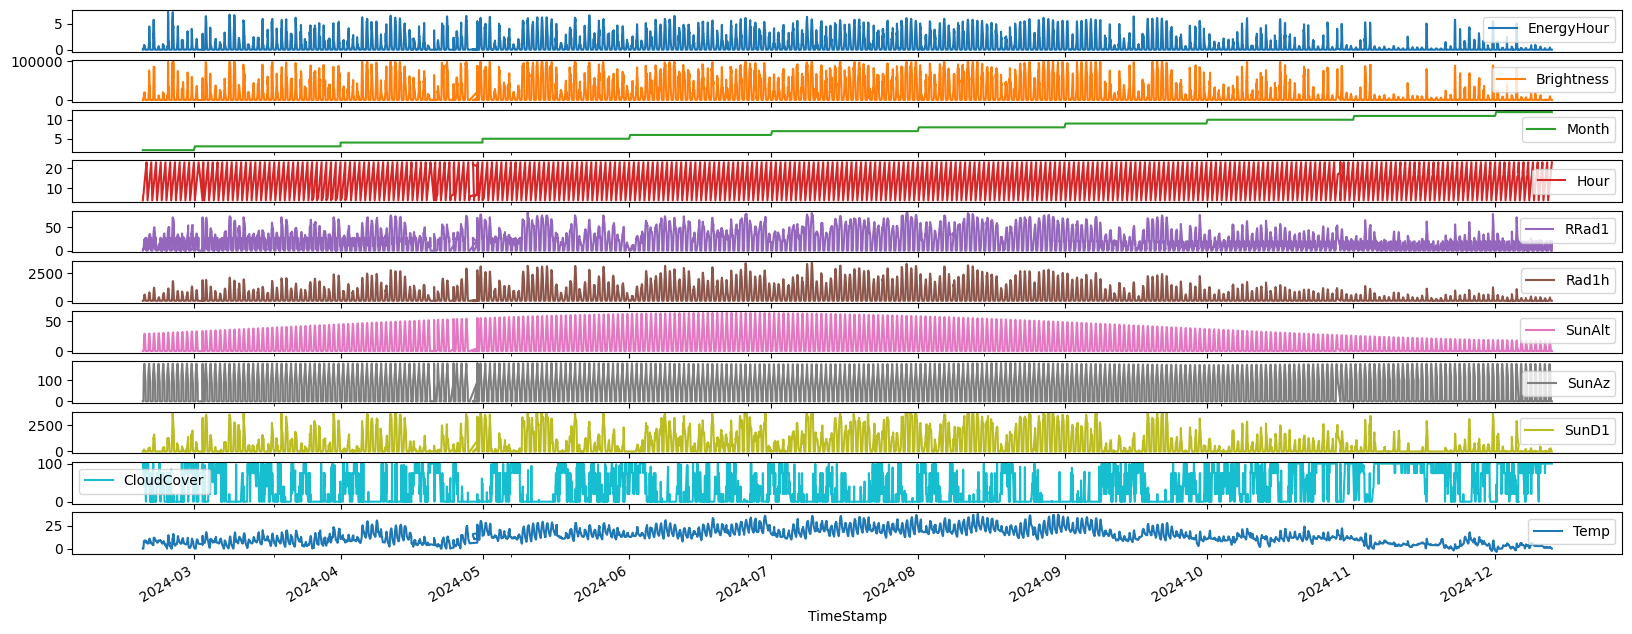

In [4]:

plot_features = data[features]
plot_features.index = data.index
_ = plot_features.plot(subplots=True)


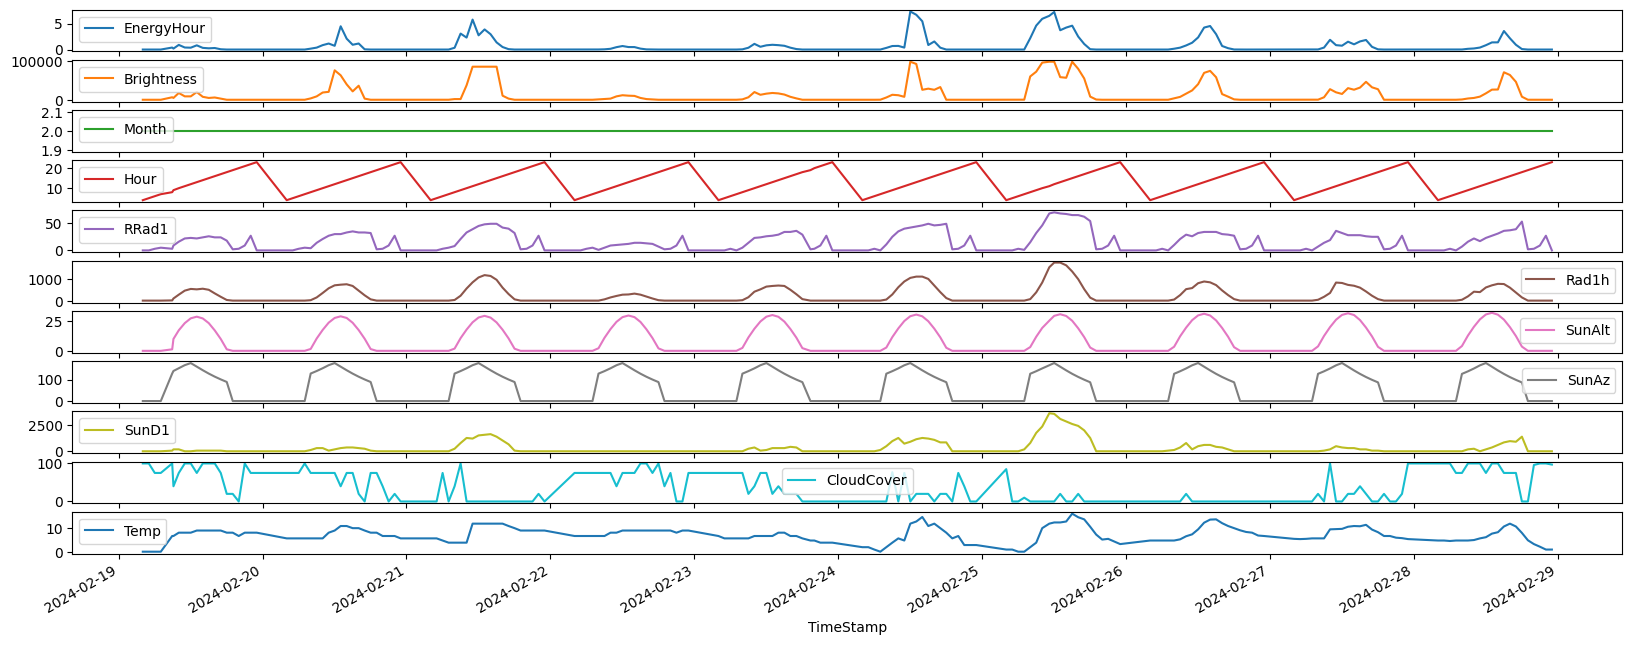

In [5]:

plot_features = data[features][:200]
plot_features.index = data.index[:200]
_ = plot_features.plot(subplots=True)

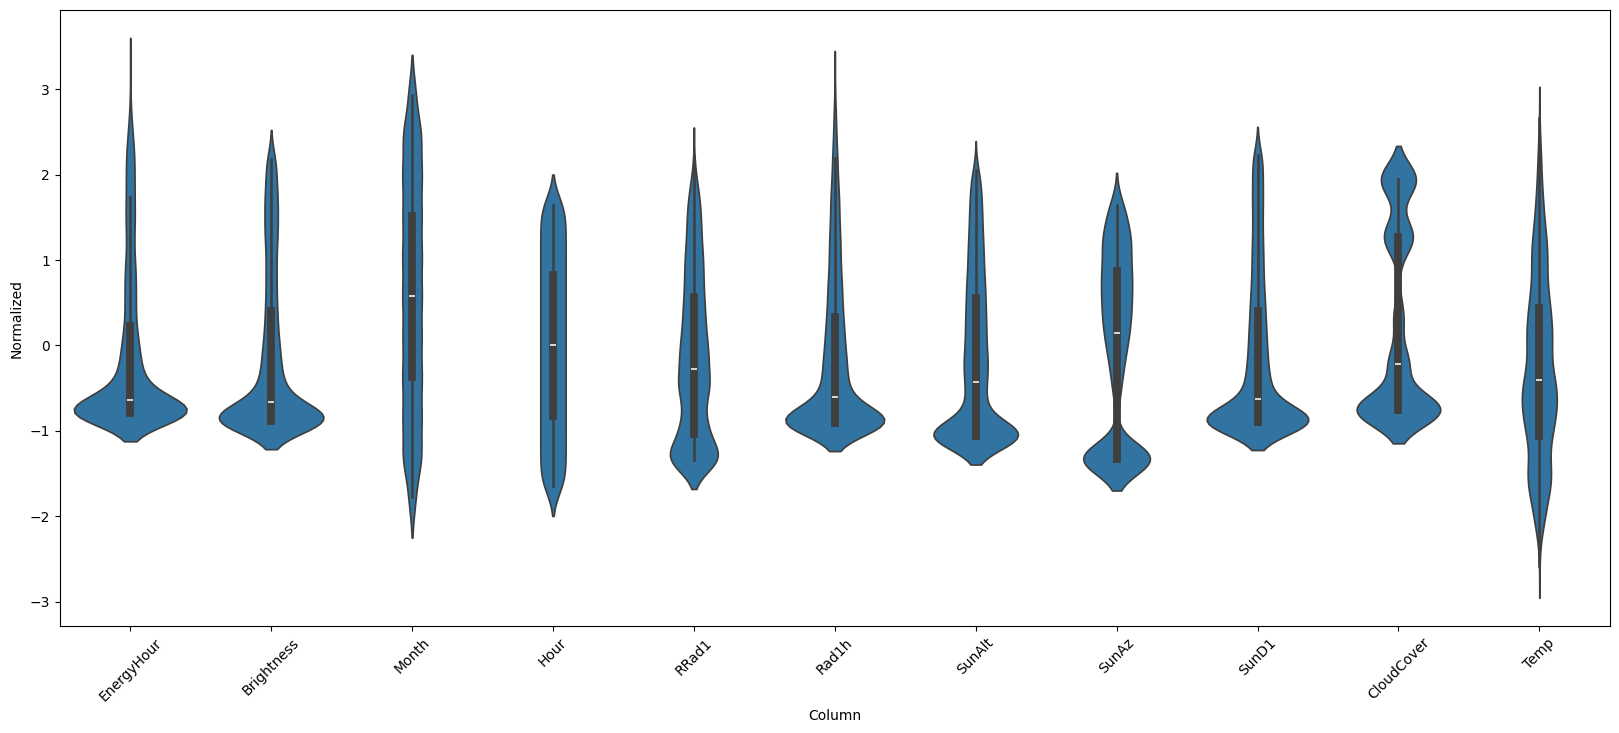

In [6]:
n = len(data)
train_data = data[0:int(n*0.75)]

train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
data_std = (data - train_mean) / train_std
data_std = data_std.melt(var_name='Column', value_name='Normalized')
ax = sns.violinplot(x='Column', y='Normalized', data=data_std)
_ = ax.tick_params("x", labelrotation=45)

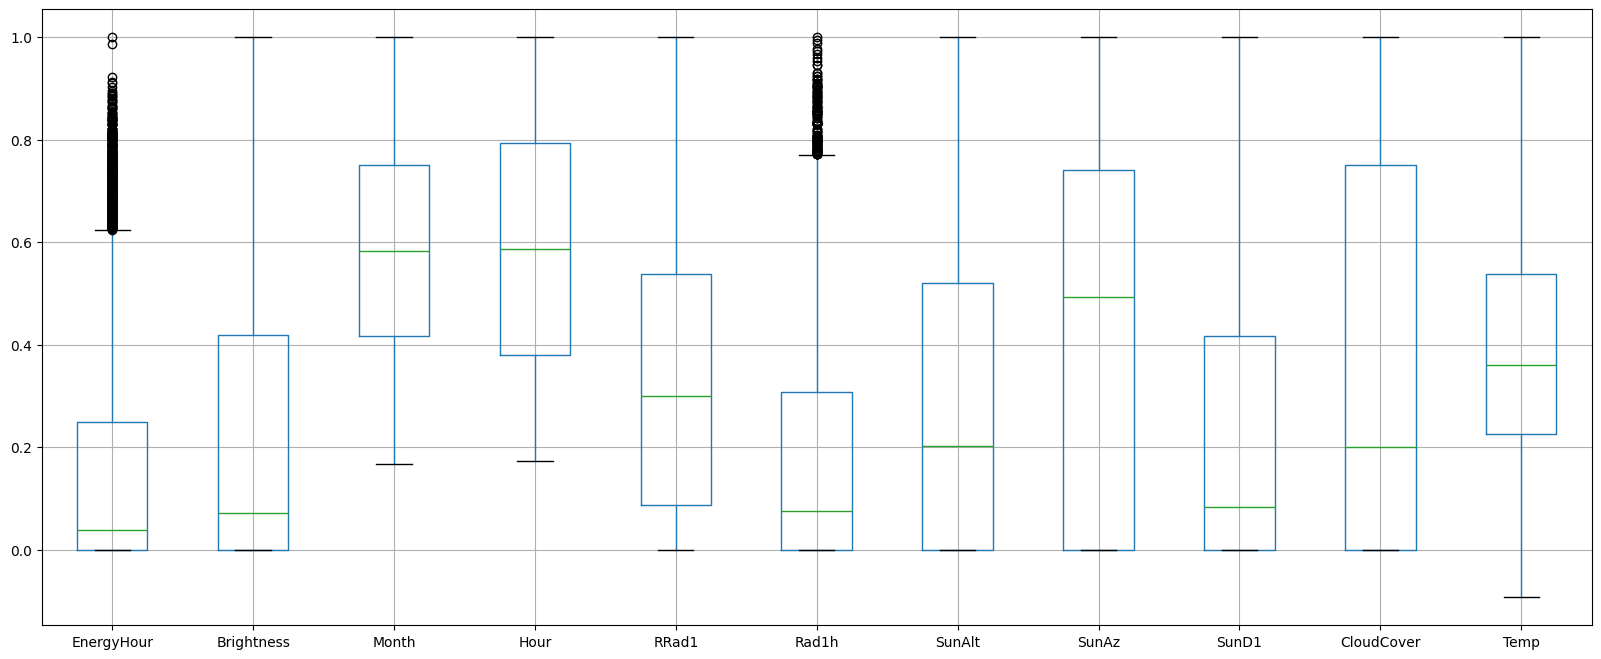

In [7]:
def normalized(data):
  data = data / data.max()
  #data = data.mean()
  return data

# box and whisker plot
dn = normalized(data)
dn.boxplot()
plt.show()

<Axes: >

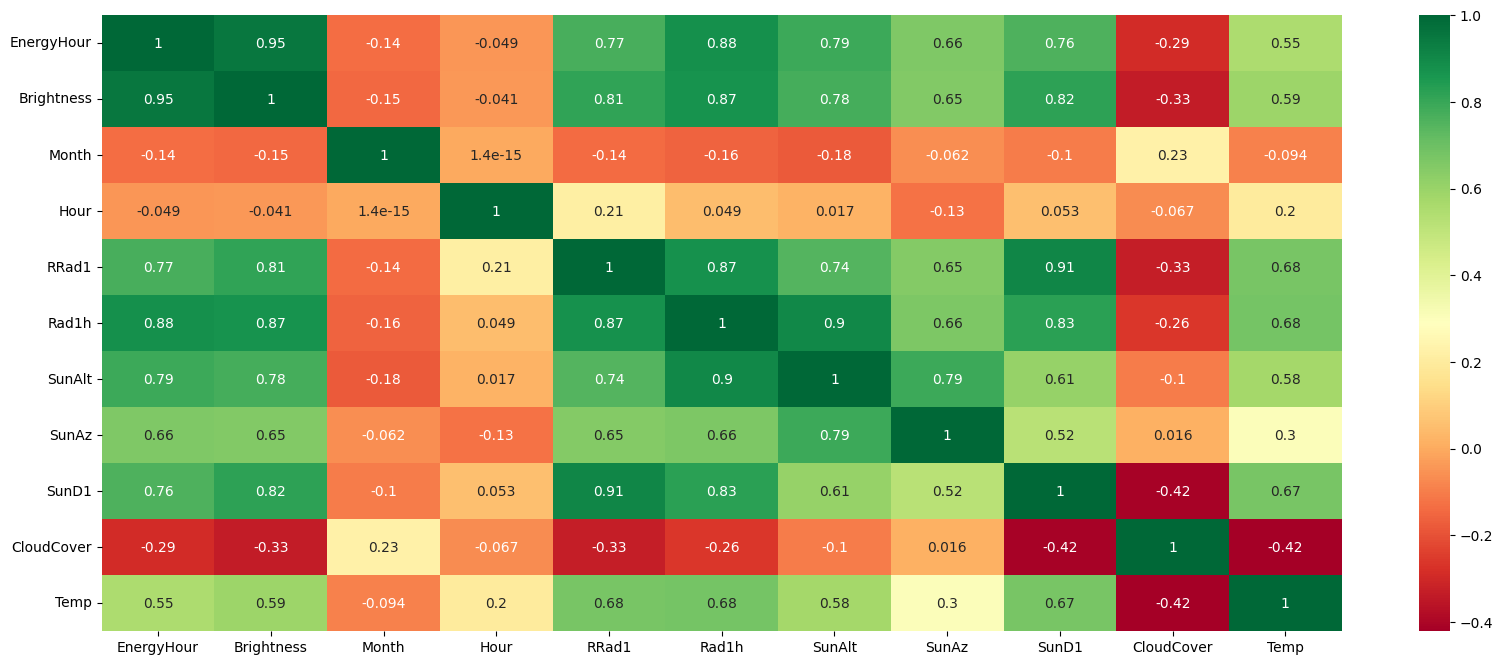

In [8]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<Axes: >

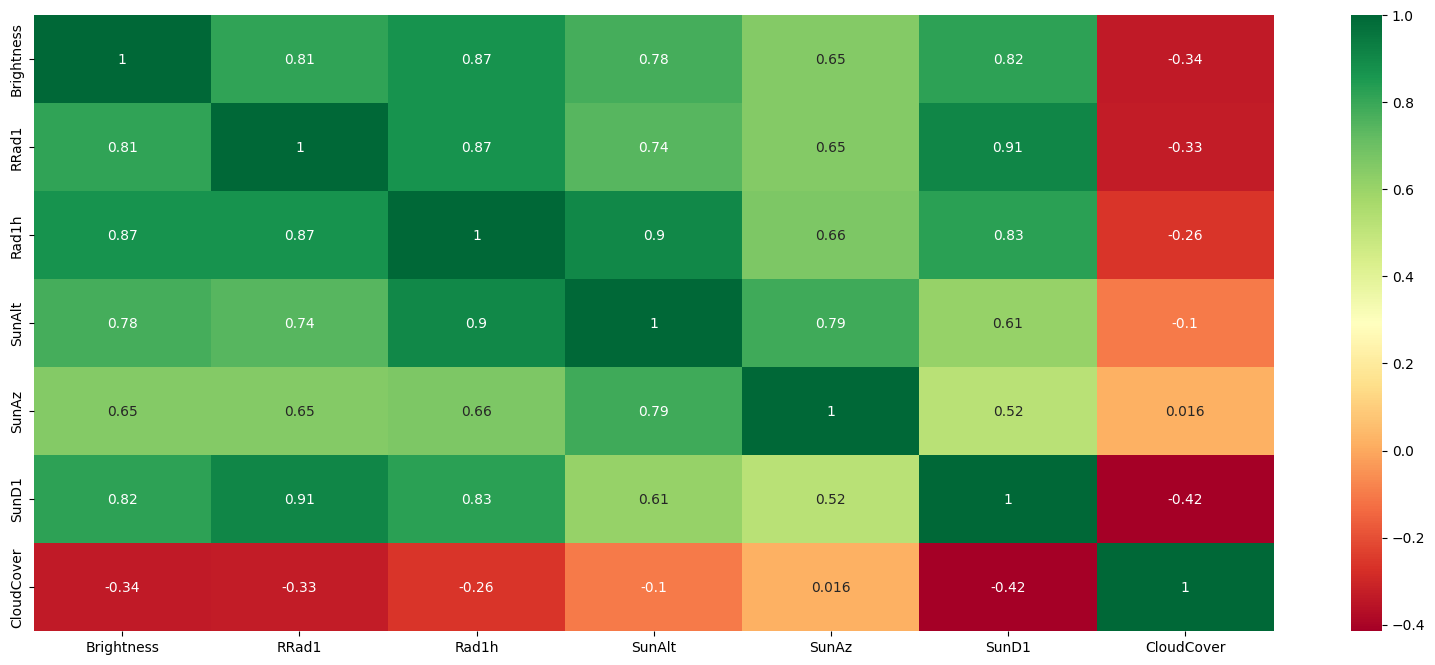

In [10]:
#get correlations of best features for brightness
data_brightness = data.drop(['EnergyHour','Month','Hour', 'Temp'], axis=1)
corrmat = data_brightness.corr()
top_corr_features = corrmat.index

#plot heat map
sns.heatmap(data_brightness[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: >

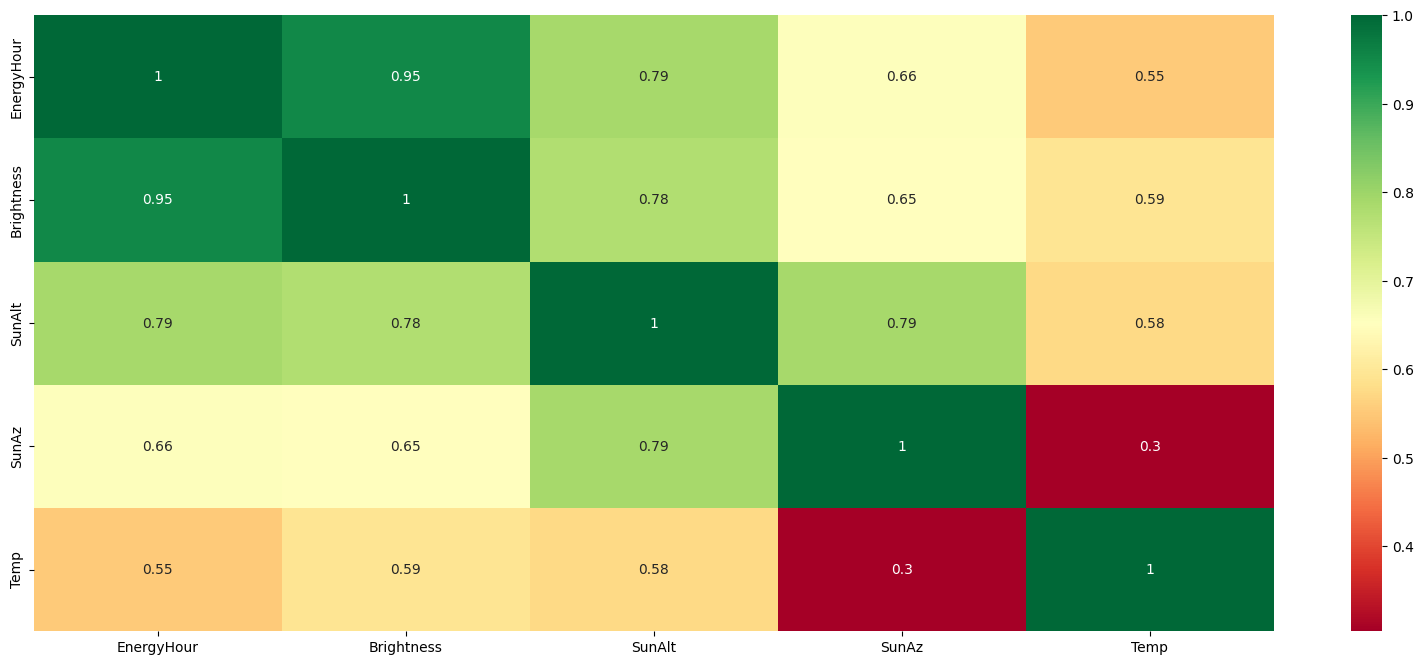

In [13]:
#get correlations of best features for energy
data_energy = data.drop(['Month','Hour','RRad1', 'Rad1h', 'SunD1', 'CloudCover'], axis=1)
corrmat = data_energy.corr()
top_corr_features = corrmat.index

#plot heat map
sns.heatmap(data_energy[top_corr_features].corr(),annot=True,cmap="RdYlGn")